# Avocado Squad

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

<ul>
    <li>Date - The date of the observation</li>
    <li>AveragePrice - the average price of a single avocado</li>
    <li>type - conventional or organic</li>
    <li>year - the year</li>
    <li>Region - the city or region of the observation</li>
    <li>Total Volume - Total number of avocados sold</li>
    <li>4046 - Total number of avocados with PLU 4046 sold</li>
    <li>4225 - Total number of avocados with PLU 4225 sold</li>
    <li>4770 - Total number of avocados with PLU 4770 sold</li>
    </ul>
    

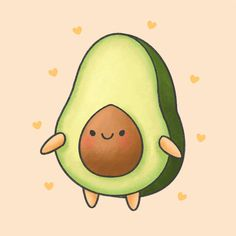

In [1]:
# import libraries 
import numpy as np 
import pandas as pd 

In [2]:
# import the data required 
data = pd.read_csv('avocado.csv')
data.head(8)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany


In [3]:
data.to_csv('~/Desktop/out.csv')  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In addition to eyeballing our data with head, info helps give us a sense of the datatype in each slide, and null values we may have to deal with. Oh and speaking of nulls...

In [5]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Happiness! No imputation needed. 

Let's do a quick aside on time...

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


## Exercise 1: Let's build a Predictive model of Average Price! 

### Step 1. Copy your labels into a separate array!

In [7]:
y = data['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

### Step 2. Drop all features you're not using (including your labels, from your dataframe)

In [8]:
x = data.drop(['Date', 'AveragePrice'], axis=1)
x

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 1.7+ MB


### Step 3. Split your data!

In [10]:
# create training and testing vars
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14599, 12) (14599,)
(3650, 12) (3650,)


### Step 4. Pipeline your features, specifically implementing your plans for your numeric and categorical features.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
avocado_num = x.drop(['region', 'type'], axis=1) 

# remove categorical features from the numeric values

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

numerical_features = list(avocado_num)
categorical_features = ['region', 'type']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features),
    ])

avocado_prepared_train = full_pipeline.fit_transform(X_train).toarray()

In [13]:
avocado_prepared_train

array([[-0.92068599,  0.69732431,  0.7406142 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56538172, -0.24201442, -0.23426848, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.43615844, -0.12302366, -0.23232292, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.95305156, -0.24727045, -0.22862353, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08073468, -0.24255489, -0.23404986, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.50077008, -0.20981208, -0.23388711, ...,  0.        ,
         1.        ,  0.        ]])

### Step 5 and 6. Train and then Test your data!

In [14]:
from sklearn.linear_model import LinearRegression


# fit a model
lm = LinearRegression()
model = lm.fit(avocado_prepared_train, y_train)


In [15]:
# Pipeline and test your model!
avocado_prepared_test = full_pipeline.transform(X_test).toarray()

predictions = lm.predict(avocado_prepared_test)

In [16]:
predictions.shape

(3650,)

### Step 7. Score your data!

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)


#print("%-12s %f" % ('MSE:', mean_squared_error(y_test, predictions)))
#print("%-12s %f" % ('RMSE:', np.sqrt(mse)))
print("%-12s %f" % ('MSE:', mse))
print("%-12s %f" % ('RMSE:', rmse))
print("%-12s %f" % ('R2:', r2))

MSE:         0.068879
RMSE:        0.262448
R2:          0.576394


## New Content since Friday: Statsmodels to output coefficients, standard error, confidence intervals etc. 

Statsmodels is a very useful tool for analyzing the statistical significance of your regression models. The following code gives you the basics you need to run a stats model Ordinary Least Squares (OLS) regression, and then output a results table.

Let's first create a simple dataframe to run our statistical model on

In [18]:
stats_data = data[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
stats_data.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [19]:
stats_label = data[['AveragePrice']]
stats_label.head()

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [20]:
import statsmodels.api as sm

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Please note we run the add_constant to add a constant feature to our dataframe that will serve as our Y-intercept

In [21]:
sm_x = sm.add_constant(stats_data)

avo_stats = sm.OLS(stats_label, sm_x)

results_stats = avo_stats.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
print(results_stats.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     124.0
Date:                Fri, 04 Mar 2022   Prob (F-statistic):          3.03e-203
Time:                        00:29:20   Log-Likelihood:                -8810.8
No. Observations:               18249   AIC:                         1.764e+04
Df Residuals:                   18240   BIC:                         1.771e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4232      0.003    474.871   

A few things to note here on how to interpet the table:

The far left column is the feature name (or in this case feature ID as we are passing in a numpy array).

If your model produces a Y Intercept (B0), it will display it as a result row under the label: 'const', which we've created by explicitly add_const to our dataframe.

The second column is the coefficient value, and then we have associated statstics for each feature including standard error and p-value. The last two columns provide you with the 95% confidence interval range for the coefficient value.

This link [Here](https://www.statsmodels.org/devel/examples/notebooks/generated/ols.html) provides additional information and examples

If you want to use your stats model to generate an array of predictions you can simply do the following by passing through the original array:

In [23]:
predictions = results_stats.predict(sm_x)
print(predictions)

0        1.427280
1        1.426608
2        1.431303
3        1.428473
4        1.426408
           ...   
18244    1.423355
18245    1.423489
18246    1.423109
18247    1.423154
18248    1.423233
Length: 18249, dtype: float64


You can also plug in a particular set of values (equal in dimension to the original dataframe) in order to output a prediction for a particular set of features:

In [24]:
results_stats.predict([2,2,2,2,2,2,2,2,2])

array([2.92860203])

Let's say we want to instead determine the confidence interval for a given prediction. We then use the get_prediction() method, again passing in our data. Output a summary frame and  you will get the CI for the overall data as well as for the given observation (obs).

In [25]:
confidence_interval = results_stats.get_prediction([2,2,2,2,2,2,2,2,2])
confidence_interval.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.928602,0.181385,2.57307,3.284134,2.08155,3.775654


## Exercise 2: Let's now try to Classify by Type of Avocado! 

In [26]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


If we're going to classify by type of Avocado, it would be good to know how many types we're dealing with. Let's take a look!

In [27]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

Now let's replicate our previous process flow, only this time let's extract 'Type' as our labels and keep 'AvgPrice' as a feature in our training set.

### Step 1.

In [28]:
new_y = data['type']
new_y

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object

### Step 2.

In [29]:
new_x = data.drop(['Date', 'type'], axis=1)
new_x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,WestTexNewMexico
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,WestTexNewMexico
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,WestTexNewMexico
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,WestTexNewMexico


### Step 2.5. 

Since our labels are categories, we have to transform them too. To accomplish this, we're going to use Label Encoder. Why aren't we OneHotEncoding this?

In [30]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
new_y = le.fit_transform(new_y) 
new_y

array([0, 0, 0, ..., 1, 1, 1])

### Step 3.

In [31]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.2)

In [32]:
print (new_X_train.shape, new_y_train.shape)
print (new_X_test.shape, new_y_test.shape)

(14599, 12) (14599,)
(3650, 12) (3650,)


### Step 4.

In [33]:
new_avocado_num = new_x.drop(['region'], axis=1) 

# remove categorical features from the numeric values

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

new_avocado_num_tr = num_pipeline.fit_transform(new_avocado_num)
numerical_features = list(new_avocado_num)
categorical_features = ['region']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features),
    ])

new_avocado_prepared_train = full_pipeline.fit_transform(new_X_train).toarray()

In [34]:
new_avocado_prepared_train

array([[ 0.69894807, -0.23912115, -0.20911804, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76348383, -1.33374505, -0.15072131, ...,  0.        ,
         0.        ,  0.        ],
       [-0.78537445,  2.09939352, -0.242007  , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.21523416,  0.88038055, -0.23990791, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30166054, -0.48789931, -0.20094623, ...,  0.        ,
         0.        ,  0.        ],
       [-0.97898173,  0.50721332, -0.23987787, ...,  0.        ,
         0.        ,  0.        ]])

### Steps 5, 6, and 7

In [35]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [36]:
# Logistic Regression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(new_avocado_prepared_train, new_y_train)


LogisticRegression(solver='liblinear')

In [37]:
# Pipeline my test data
new_avocado_prepared_test = full_pipeline.fit_transform(new_X_test).toarray()

#Generate predictions and score them!
predicted = log_reg.predict(new_avocado_prepared_test)
score = log_reg.predict_proba(new_avocado_prepared_test)[:,1]

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))

Accuracy:    0.976712


## NEW STUFF! SVM

In [38]:
from sklearn.svm import SVC  

# SVM

svm = SVC() # Define our particular learning model
svm.fit(new_avocado_prepared_train, new_y_train) # Train your model calling 
#the fit function on your training data and labels

predicted = svm.predict(new_avocado_prepared_test) # Use your newly trained model on 
#your test data to generate a set of predictions

### Metrics for Classification

In [39]:
from sklearn.metrics import confusion_matrix

# For all these you are comparing your newly created set of predicted labels with the real set of test labels
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted))) 
print("%-12s %f" % ('Precision:', metrics.precision_score(new_y_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('Recall:', metrics.recall_score(new_y_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(new_y_test, predicted, labels=None, pos_label=1, average='binary', sample_weight=None)))


Accuracy:    0.979452
Precision:   0.976549
Recall:      0.981481
F1 Score:    0.979009


### Confusion Matrix

In [40]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm, new_avocado_prepared_test, new_y_test) 
print("Confusion Matrix: \n")
plt.show()

Confusion Matrix: 



<Figure size 640x480 with 2 Axes>

### ROC Curve and Associated AUC

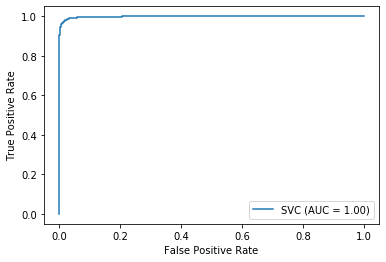

In [41]:
metrics.plot_roc_curve(svm, new_avocado_prepared_test, new_y_test) 
plt.show()

## Cross Validation!


In [42]:
from sklearn.model_selection import KFold
from sklearn import model_selection

To understand how this works intutitively, let's create a small array and kfold split it so we can see it in action!

In [43]:
x = [0,1,2,3,4,5,6,7,8,9,10,11]
kf = KFold(n_splits=4)

for train_index, test_index in kf.split(x):
    print ("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 3  4  5  6  7  8  9 10 11] TEST: [0 1 2]
TRAIN: [ 0  1  2  6  7  8  9 10 11] TEST: [3 4 5]
TRAIN: [ 0  1  2  3  4  5  9 10 11] TEST: [6 7 8]
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [ 9 10 11]


We can also see it in our own dataframe with a neat trick where we can print out the index values associated with the splits to see where our data is being split.

In [44]:
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(new_avocado_prepared_train):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 3650  3651  3652 ... 14596 14597 14598] TEST: [   0    1    2 ... 3647 3648 3649]
TRAIN: [    0     1     2 ... 14596 14597 14598] TEST: [3650 3651 3652 ... 7297 7298 7299]
TRAIN: [    0     1     2 ... 14596 14597 14598] TEST: [ 7300  7301  7302 ... 10947 10948 10949]
TRAIN: [    0     1     2 ... 10947 10948 10949] TEST: [10950 10951 10952 ... 14596 14597 14598]


Ok let's see it in action! Let's rerun our previous classifier with KFolded data and see if we can't get a more accurate read on our performance.

In [45]:
# First we define our cross-validation model parameters. In this case we're going to use KFold, with 10 splits
# where we first shuffle our data before splitting it, and use a random seed to ensure a consistent repeatable shuffle
kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True) 

# Next we define the classifier we will be using for our model (we simply reuse the two we used previously)
log_model_kfold = LogisticRegression(solver='liblinear')

svm_model_kfold = SVC()

# Finally we pull it all together. We call cross val score to generate an accuracy performance score for our model
# we define our learning model, data, labels, and cross-val splitting strategy (all defined previously)
log_results_kfold = model_selection.cross_val_score(log_model_kfold, new_avocado_prepared_train, new_y_train, cv=kfold)

svm_results_kfold = model_selection.cross_val_score(svm_model_kfold, new_avocado_prepared_train, new_y_train, cv=kfold)


# Because we're collecting results from all runs, we take the mean value
print("Logrithmic Regression Accuracy: %.2f%%" % (log_results_kfold.mean()*100.0)) 

print("SVM Regression Accuracy: %.2f%%" % (svm_results_kfold.mean()*100.0)) 

Logrithmic Regression Accuracy: 97.86%
SVM Regression Accuracy: 97.97%


## New Stuff! PCA

Let's first look at our current dataset dimensionality

In [46]:
new_avocado_prepared_train.shape

(14599, 65)

We have 65 features!? Is that a lot? That seems like a lot. 

In [47]:
from sklearn import decomposition

In [48]:
# First we create a PCA object with the 4 components as a parameter
pca = decomposition.PCA(n_components=4)

# Now we run the fit operation to convert our 
# data to a PCA transformmed data
avocado_pca_train = pca.fit_transform(new_avocado_prepared_train)

In [49]:
avocado_pca_train.shape

(14599, 4)

In [50]:
# Logistic Regression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(avocado_pca_train, new_y_train)



LogisticRegression(solver='liblinear')

In [51]:
# PCA our Test data
avocado_pca_test = pca.transform(new_avocado_prepared_test)


predicted = log_reg.predict(avocado_pca_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(new_y_test, predicted)))

Accuracy:    0.878630
